## Pandas

В этом ноутбуке мы познакомимся с основными фичами pandas. Эта библиотека огромна, поэтому мы сможем лишь немного поиграться с доступной функциональностью. Для детального ознакомления стоит почитать документацию

### 1. Первое знакомство

In [1]:
import pandas as pd  # Стандартный алиас для pandas

In [2]:
# Читаем датасет из csv файла
coins = pd.read_csv('coins.csv')  

In [3]:
# Посмотрим что получилось
coins

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
1,2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
3,2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
4,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37583,2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
37584,2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
37585,2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08
37586,2018-06-06,0.127555,1313.0,1.596436e+07,733.0,ZIL,Zilliqa,0.127555,0.133254,0.124194,0.131766,54667900.0,9.348810e+08


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

По выводу можно получить общее представление о таблице. Видно, что в таблице могут храниться как числовые так и категориальные (строковые) данные, количество строк и столбцов. Всю эту информацию и многое другое можно получить и в коде.

Для удобства мы далее ограничим размер вывода pandas в jupyter notebook.

In [7]:
pd.set_option('display.max_rows', 10)

In [8]:
coins.shape  # Размер таблицы

(37588, 13)

In [9]:
coins.head(3)  #  Первые 3 строки таблицы. Аналогично tail для последних строк

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09


In [10]:
coins.describe()  # Простейшие статистики для числовых колонок

,price,txCount,txVolume,activeAddresses,open,high,low,close,volume,market
count,37261.000000,3.606800e+04,3.575800e+04,3.606800e+04,37588.000000,37588.000000,37588.000000,37588.000000,3.758800e+04,3.758800e+04
mean,127.395042,1.960144e+04,4.745076e+53,3.295039e+04,125.652051,131.127449,119.791636,125.771519,1.302249e+08,2.720948e+09
std,859.109058,7.702995e+04,8.972837e+55,1.143196e+05,855.436562,890.527305,813.697042,855.954704,8.042239e+08,1.534546e+10
min,0.000002,0.000000e+00,0.000000e+00,0.000000e+00,0.000002,0.000003,0.000002,0.000002,0.000000e+00,0.000000e+00
25%,0.059871,3.410000e+02,2.751161e+05,2.920000e+02,0.053032,0.057809,0.049289,0.053147,8.794400e+04,1.356655e+07
50%,1.020000,1.214500e+03,2.007019e+06,1.388000e+03,1.000000,1.050000,1.000000,1.000000,1.949815e+06,1.323890e+08
75%,8.710000,6.247000e+03,1.425408e+07,1.173400e+04,8.772500,9.480000,8.150000,8.810000,1.770732e+07,5.156410e+08
max,19475.800000,1.349890e+06,1.696744e+58,1.283929e+06,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11


In [11]:
coins['price']  # Можно выбрать отдельную колонку

0        135.300000
1          4.300000
2        134.440000
3          4.370000
4        144.000000
            ...    
37583      0.293325
37584      0.039586
37585    239.760000
37586      0.127555
37587      1.270000
Name: price, Length: 37588, dtype: float64

In [12]:
coins['high'] - coins['low']  # Над колонками работают поэлементные операции

0         3.880000
1         0.220000
2        13.490000
3         0.340000
4        12.880000
           ...    
37583     0.010455
37584     0.002057
37585    11.130000
37586     0.009060
37587     0.090000
Length: 37588, dtype: float64

In [13]:
coins['spread'] = coins['high'] - coins['low']  # Можно добавлять новые колонки в таблицу

In [14]:
del coins['spread']  # Удаляем добавленную колонку. Можно иначе: coins.pop('spread')

Колонки в таблицах pandas ведут себя как массивы неизменяемой длины. Приятное отличие состоит в том, что колонки имеют много полезных для аналитики методов. Например,

In [15]:
coins['symbol'].value_counts() # Количества записей в таблице для каждой монеты

BTC      1866
LTC      1866
DOGE     1635
VTC      1599
DGB      1582
         ... 
ZIL       133
POLY      125
CENNZ      86
LOOM       85
CTXC       52
Name: symbol, Length: 66, dtype: int64

In [17]:
# Самая высокая цена монеты во всей таблице. 
coins['price'].max()

19475.8

In [18]:
# Для колонок работают стандартные методы индексации списков, но есть и другие...
coins['txVolume'][:4]

0    6.879868e+07
1    4.431952e+07
2    1.138128e+08
3    3.647810e+07
Name: txVolume, dtype: float64

Для колонок определены бинарные операции и методы которые возвращают специальную колонку из булевских значений. Истина будет храниться только для тех индексов для которых выполнено условие. Лучше объяснит пример

In [20]:
# Строки колонки для которых txCount был больше 1000
coins['txCount'] > 1000

0         True
1         True
2         True
3         True
4         True
         ...  
37583     True
37584     True
37585     True
37586     True
37587    False
Name: txCount, Length: 37588, dtype: bool

In [21]:
# Строки в которых значение попадает в заранее заданный набор
coins['symbol'].isin(['BTC', 'ADA'])

0         True
1        False
2         True
3        False
4         True
         ...  
37583    False
37584    False
37585    False
37586    False
37587    False
Name: symbol, Length: 37588, dtype: bool

In [22]:
# Строки колонки в которых имя монеты содержит букву 'C' 
coins['symbol'].str.contains('C')

0         True
1         True
2         True
3         True
4         True
         ...  
37583    False
37584    False
37585     True
37586    False
37587    False
Name: symbol, Length: 37588, dtype: bool

In [23]:
# Для колонок можно составлять сложные логические выражения (скобки обязательны!)
((coins['price'] > 18000) | (coins['market'] > 200000)) & (coins['symbol'] == 'BTC')

0         True
1        False
2         True
3        False
4         True
         ...  
37583    False
37584    False
37585    False
37586    False
37587    False
Length: 37588, dtype: bool

Основное назначение получающихся булевых колонок в том, что они могут быть использованы как индексирующий объект. Эдакий продвинутый slicing для колонок и таблиц

In [24]:
# Выбрать из таблицы записи когда цена биткоина была меньше 100 USD
coins[(coins['price'] < 100) & (coins['symbol'] == 'BTC')]

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
12,2013-05-04,98.10,50102.0,3.896570e+07,69959.0,BTC,Bitcoin,98.10,115.00,92.50,112.50,0.0,1.089890e+09
98,2013-06-16,99.80,42781.0,4.696943e+07,48785.0,BTC,Bitcoin,99.80,101.60,98.95,99.51,0.0,1.127120e+09
100,2013-06-17,99.90,45798.0,5.455223e+07,56902.0,BTC,Bitcoin,99.90,102.21,99.00,101.70,0.0,1.128720e+09
124,2013-06-29,94.66,36376.0,4.519440e+07,60980.0,BTC,Bitcoin,94.66,99.99,93.00,94.99,0.0,1.074010e+09
126,2013-06-30,95.00,30800.0,3.584930e+07,50485.0,BTC,Bitcoin,95.00,98.12,94.22,96.61,0.0,1.078260e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2013-07-25,94.50,42384.0,7.153660e+07,66440.0,BTC,Bitcoin,94.50,97.33,93.87,96.90,0.0,1.082800e+09
178,2013-07-26,96.95,37209.0,7.056459e+07,62558.0,BTC,Bitcoin,96.95,97.47,96.00,96.02,0.0,1.111160e+09
180,2013-07-27,96.02,36711.0,4.158844e+07,52438.0,BTC,Bitcoin,96.02,97.00,93.00,94.12,0.0,1.100900e+09
182,2013-07-28,94.40,37134.0,5.463939e+07,49179.0,BTC,Bitcoin,94.40,100.58,94.00,99.76,0.0,1.082750e+09


In [25]:
# Количество транзакций лайткойна
coins['txCount'][coins['symbol'] == 'LTC']

1         9174.0
3         9275.0
5         9099.0
7         8990.0
9         8031.0
          ...   
37277    22879.0
37347    22155.0
37417    24326.0
37487    25172.0
37557    25346.0
Name: txCount, Length: 1866, dtype: float64

**Задание**: У какой монеты была самая высокая цена?

In [27]:
# your code here

Для таблиц есть индексирование и по строкам и по колонкам.

In [6]:
# Выбрать из таблицы максимальную цену и объем торгов за дни когда цена дож была выше 1 цента
coins.loc[
    (coins['symbol'] == 'DOGE') & (coins['price'] > 0.01),
    ['high', 'volume']
]

,high,volume
27257,0.015788,283717000.0
27322,0.018773,288184000.0
27387,0.017664,235114000.0
27452,0.015569,115255000.0
27517,0.013560,100243000.0
27582,0.013153,62722000.0
27647,0.013339,56971300.0
27712,0.013653,55890600.0
27777,0.013187,65899000.0
27842,0.011779,62765500.0


Начиная с этого момента вы уже можете делать простейшие выборки из данных и немного их преобразовывать. Конечно, не забывайте  использовать help() и tab-completion чтобы узнать больше о возможностях pandas. В голове стоит держать такое правило: если вам очень хочется пройтись циклом по таблице и что-то сделать с данными, очень вероятно, что вы делаете что-то неправильно и, скорее всего, в pandas есть инструмент для вашей задачи. Оставшаяся часть ноутбука посвящена перечислению фич, и может показаться скучной, но не зная этих фич вы каждый раз будете переизобретать велосипед.

### 2. Глобальные настройки

Возможно вам захочется сконфигурировать работу pandas. Большинство глобальных настроек касаются отображения таблицы или данных

In [30]:
# Узнать максимальное кол-во отображаемых в таблице с
pd.get_option('display.max_columns')

20

In [31]:
# Узнать больше про опцию. Список всех опций тут: 
# https://pandas.pydata.org/pandas-docs/version/0.23.4/options.html#available-options
pd.describe_option('display.max_columns')

display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the width of the terminal and print a truncated object which fits
    the screen width. The IPython notebook, IPython qtconsole, or IDLE
    do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 20] [currently: 20]


In [32]:
# Назначть максимальное число отображаемых строк
pd.set_option('display.max_columns', 15)

### 3. Типы данных в pandas

В pandas есть два основных типа данных. pandas.Series и pandas.DataFrame.

#### 3.1 pandas.Series

Про pandas.Series стоит думать как про одномерный массив фиксированного размера из данных одного типа. В отличие от массивов доступ к элементам может быть по нечисловому индексу. Индекс стоит понимать как имена строк.

Объекты типа pandas.Series очень часто используются как возвращаемые значения в pandas.

In [33]:
# pandas.Series хранящий буквы со стандартной индексацией
pd.Series(data=['BTC', 'LTC', 'DOGE', 'DASH'])

0     BTC
1     LTC
2    DOGE
3    DASH
dtype: object

In [34]:
# pandas.Series хранящий числа типа str cо специальным индексом
pd.Series(data=['BTC', 'ETH', 'XRP'], 
          index=['first_coin', 'second_coin', 'third_coin'], dtype=str)

first_coin     BTC
second_coin    ETH
third_coin     XRP
dtype: object

In [35]:
# pandas.Series созданный из словаря
pd.Series({'first_coin': 'BTC', 'second_coin': 'ETH', 'third_coin': 'XRP'})

first_coin     BTC
second_coin    ETH
third_coin     XRP
dtype: object

In [36]:
# Стандартная индексация
sequence = pd.Series(data=['!', 'the', 'Moon', 'To'])

In [37]:
sequence[[3, 1, 2, 0, 0, 0]]  # Доступ к нескольким элементам по их позициям 

3      To
1     the
2    Moon
0       !
0       !
0       !
dtype: object

In [38]:
sequence[3]  # Доступ к элементу по позиции

'To'

In [47]:
# Спец индексация
sequence = pd.Series(data=['!', 'the', 'Moon', 'To'], 
                     index=['04-11-2018', '02-11-2018', '03-11-2018', '01-11-2018'])

In [48]:
sequence[['01-11-2018', '02-11-2018', '03-11-2018', '04-11-2018']]  # Доступ к нескольким элементам по их индексам

01-11-2018      To
02-11-2018     the
03-11-2018    Moon
04-11-2018       !
dtype: object

In [49]:
sequence['01-11-2018']  # Доступ к элементу по индексу

'To'

In [50]:
# Чтобы не засорять global namespace
del sequence

#### 3.2 pandas.DataFrame

Данные типа pandas.DataFrame это двумерный массив (переменного размера) разнородных данных (но однородных по колонкам). Лучше всего предстаставлять себе pandas.DataFrame как набор колонок, где каждая колонка это pandas.Series.

In [51]:
# Создание простейшей таблицы
pd.DataFrame(data=['BTC', 'LTC', 'XRP'])

,0
0,BTC
1,LTC
2,XRP


In [52]:
# Cоздание таблицы с именами колонок
pd.DataFrame(data=[['BTC', 10000],['LTC', 200],['XRP', 1]], 
             columns=['symbol', 'price'])

,symbol,price
0,BTC,10000
1,LTC,200
2,XRP,1


In [53]:
# Cоздание таблицы с именами колонок и указанием индекса
pd.DataFrame(
    data=[['BTC', 10000],['LTC', 200],['XRP', 1]],
    columns=['symbol', 'price'],
    # DatetimeIndex - это специальный тип данных для индексов содержащих время
    index=pd.DatetimeIndex(['01-11-2018', '03-11-2018', '23-08-2018'])
)

,symbol,price
2018-01-11,BTC,10000
2018-03-11,LTC,200
2018-08-23,XRP,1


In [54]:
# Создание по готовым pandas.Series
pd.DataFrame({
    'symbol': pd.Series(data=['BTC','LTC'], index=pd.DatetimeIndex(['01-11-2018', '03-11-2018'])),
    'price': pd.Series(data=[10000, 200], index=pd.DatetimeIndex(['01-11-2018', '03-11-2018']))
})

,symbol,price
2018-01-11,BTC,10000
2018-03-11,LTC,200


Некоторые функции в pandas одинаково применимы как к строкам так и к столбцам. В этом случае, в функцию можно передать аргумент axis. Значение 0 идет по умолчанию и ему соответствует работа по строкам, 1 - по колонкам.

### 4. Базовые методы pandas.Series

Посмотрим на самые базовые методы класса pandas.Series

In [55]:
sequence = pd.Series(data=['BTC', 'LTC', 'DOGE', 'DASH'], index=['leader', 'alternative', 'joke', 'bouncer'])

In [56]:
# Индекс наших данных
sequence.axes

[Index(['leader', 'alternative', 'joke', 'bouncer'], dtype='object')]

In [57]:
# Тип наших данных
sequence.dtype

dtype('O')

In [58]:
# Проверка на пустоту
sequence.empty

False

In [59]:
# Количество размерностей. Для pandas.Series всегда 1
sequence.ndim

1

In [60]:
# Количество элементов
sequence.size

4

In [61]:
# Размеры
sequence.shape

(4,)

In [62]:
# Получить данные в виде numpy массива. Низкоуровневое представление с точки зрения pandas
sequence.values

array(['BTC', 'LTC', 'DOGE', 'DASH'], dtype=object)

In [66]:
# Получить первые 3 элемента
sequence.head(3)

leader          BTC
alternative     LTC
joke           DOGE
dtype: object

In [67]:
# Получить последние 2 элемента
sequence.tail(2)

joke       DOGE
bouncer    DASH
dtype: object

In [68]:
del sequence

### 5. Базовые методы pandas.DataFrame

Класс DataFrame огромен. Мы рассмотрим только самые часто используемые в нем методы

In [72]:
table = pd.DataFrame(
    data=[['BTC', 10000],['LTC', 200],['XRP', 1]],
    columns=['symbol', 'price'],
    # DatetimeIndex - это специальный тип данных для индексов содержащих время
    index=pd.DatetimeIndex(['01-11-2018', '03-11-2018', '23-08-2018'])
)
table

,symbol,price
2018-01-11,BTC,10000
2018-03-11,LTC,200
2018-08-23,XRP,1


In [73]:
# Транспонировать таблицу
table.T

,2018-01-11,2018-03-11,2018-08-23
symbol,BTC,LTC,XRP
price,10000,200,1


In [74]:
# Получить индексы срок и столбцов
table.axes

[DatetimeIndex(['2018-01-11', '2018-03-11', '2018-08-23'], dtype='datetime64[ns]', freq=None),
 Index(['symbol', 'price'], dtype='object')]

In [75]:
# Получить типы данных в колонках
table.dtypes

symbol    object
price      int64
dtype: object

In [76]:
# Проверка на пустоту
table.empty

False

In [77]:
# Размеры
table.shape

(3, 2)

In [78]:
# Количество элементов
table.size

6

In [79]:
# Низкоуровневое представление таблицы
table.values

array([['BTC', 10000],
       ['LTC', 200],
       ['XRP', 1]], dtype=object)

In [80]:
# Получить первые 3 строки
table.head(3)

,symbol,price
2018-01-11,BTC,10000
2018-03-11,LTC,200
2018-08-23,XRP,1


In [61]:
# Получить последние 2 строки
table.tail(2)

,symbol,price
2018-03-11,LTC,200
2018-08-23,XRP,1


In [62]:
del table

### 6. Работа со строками и столбцами

Обращаться к строкам таблицы можно по номеру или по индексу

In [85]:
table = pd.DataFrame(
    data=[['BTC', 10000],['LTC', 200],['XRP', 1], ['BTC', 9000]],
    columns=['symbol', 'price'],
    # DatetimeIndex - это специальный тип данных для индексов содержащих время
    index=pd.DatetimeIndex(['01-11-2018', '03-11-2018', '23-08-2018', '02-11-2018'])
)
table

,symbol,price
2018-01-11,BTC,10000
2018-03-11,LTC,200
2018-08-23,XRP,1
2018-02-11,BTC,9000


#### 6.1. Доступ к элементам

In [93]:
# Обращение по номеру
table.iloc[2]

symbol    XRP
price       1
Name: 2018-08-23 00:00:00, dtype: object

In [94]:
# Обращение по диапазону номеров
table[1:3]

,symbol,price
2018-03-11,LTC,200
2018-08-23,XRP,1


In [95]:
# Обращение по индексу
table.loc[pd.Timestamp('01-11-2018')]

symbol      BTC
price     10000
Name: 2018-01-11 00:00:00, dtype: object

In [97]:
# Обращение по диапазону индексов
table.loc['01-11-2018':'03-11-2018']

,symbol,price
2018-01-11,BTC,10000
2018-03-11,LTC,200
2018-02-11,BTC,9000


#### 6.2. Добавление, удаление, переименование колонок и строк

In [99]:
# Удаление строк по их индексам. Можно использовать для удаления колонок, указав axis=1
# Посмотрите еще методы drop_duplicates and dropna
table.drop([pd.Timestamp('2018-08-23'), pd.Timestamp('2018-01-11')])

,symbol,price
2018-03-11,LTC,200
2018-02-11,BTC,9000


In [100]:
# Чтобы добавить новую колонку достаточно присвоить ей значение
table['volume'] = [1e9, 1e6, 1e4, 1e9]
table

,symbol,price,volume
2018-01-11,BTC,10000,1.000000e+09
2018-03-11,LTC,200,1.000000e+06
2018-08-23,XRP,1,1.000000e+04
2018-02-11,BTC,9000,1.000000e+09


In [101]:
# Удалять колонки очень просто
del table['volume']

In [102]:
# Переименовывание колонок
table.rename(columns={'symbol': 'Symbol', 'price': 'Price'})

,Symbol,Price
2018-01-11,BTC,10000
2018-03-11,LTC,200
2018-08-23,XRP,1
2018-02-11,BTC,9000


#### 6.3. Итерирование

Итерироваться по таблице можно разными способами, но обычно так не стоит делать и лучше написать решение в виде манипуляций над столбцами/колонками 

In [103]:
# По колонкам
for column in table:
    print(column)

symbol
price


In [104]:
# По колонкам как по словарю. Значения в "словаре" это pandas.Series
for column, series in table.iteritems():
    print(column)
    print(series)

symbol
2018-01-11    BTC
2018-03-11    LTC
2018-08-23    XRP
2018-02-11    BTC
Name: symbol, dtype: object
price
2018-01-11    10000
2018-03-11      200
2018-08-23        1
2018-02-11     9000
Name: price, dtype: int64


In [106]:
# По строкам как по словарю. Значения в "словаре" это pandas.Series
for index, row in table.iterrows():
    print(index)
    print(row)

2018-01-11 00:00:00
symbol      BTC
price     10000
Name: 2018-01-11 00:00:00, dtype: object
2018-03-11 00:00:00
symbol    LTC
price     200
Name: 2018-03-11 00:00:00, dtype: object
2018-08-23 00:00:00
symbol    XRP
price       1
Name: 2018-08-23 00:00:00, dtype: object
2018-02-11 00:00:00
symbol     BTC
price     9000
Name: 2018-02-11 00:00:00, dtype: object


#### 6.4. Сортировка

Строки и столбцы таблицы можно сортировать. Результат сортирующих методов возвращает новую таблицу!

In [107]:
# Отсортировать строки по индексу по убыванию
table.sort_index(ascending=False)

,symbol,price
2018-08-23,XRP,1
2018-03-11,LTC,200
2018-02-11,BTC,9000
2018-01-11,BTC,10000


In [108]:
# Отсортировать колонки по возрастанию
table.sort_index(axis=1, ascending=True)

,price,symbol
2018-01-11,10000,BTC
2018-03-11,200,LTC
2018-08-23,1,XRP
2018-02-11,9000,BTC


In [109]:
# Отсортировать таблицу алгоритмом quicksort по названию, а если значения равны то по цене
table.sort_values(by=['symbol', 'price'], kind='quicksort')

,symbol,price
2018-02-11,BTC,9000
2018-01-11,BTC,10000
2018-03-11,LTC,200
2018-08-23,XRP,1


In [110]:
del table, index, row, column, series

### 7. Статистические функции

Посмотрим как pandas позволяет вычислять простейшие статистики для датасетов. Методы которые мы перечислим ниже имеют аргумет axis, который указывает вдоль какой оси надо вычислять статистику. Обычно, по-умолчанию axis=0, что соответсвует вычислениям по строкам. Если в данных есть пропуски, то они не учитываются при вычислении статистик!

In [127]:
earnings = pd.DataFrame(
    data=[[7629.39, -9357.49, -1661.3, 8597.23],
          [560.68, None, 10.46, 3578.5],
          [487.38, 7560.38, 1090.87, -5164.93],
          [560.68, 7560.38, None, -5164.93]],
    columns=['BTC', 'DOGE', 'ADA', 'ETH'],
    index=['yesterday', 'today', 'tomorrow','aftertomorrow']
)


In [128]:
earnings

,BTC,DOGE,ADA,ETH
yesterday,7629.39,-9357.49,-1661.30,8597.23
today,560.68,NaN,10.46,3578.50
tomorrow,487.38,7560.38,1090.87,-5164.93
aftertomorrow,560.68,7560.38,NaN,-5164.93


In [129]:
# Количество не None записей для каждой монеты
earnings.count()

BTC     4
DOGE    3
ADA     3
ETH     4
dtype: int64

In [130]:
# Заработки по дням
earnings.sum(axis=1)

yesterday        5207.83
today            4149.64
tomorrow         3973.70
aftertomorrow    2956.13
dtype: float64

In [131]:
# Средний заработок по каждой монете
earnings.mean()

BTC     2309.532500
DOGE    1921.090000
ADA     -186.656667
ETH      461.467500
dtype: float64

In [132]:
# Медианный заработок по каждой монете
earnings.median()

BTC      560.680
DOGE    7560.380
ADA       10.460
ETH     -793.215
dtype: float64

In [133]:
# Моды заработка по каждой монете
earnings.mode()

,BTC,DOGE,ADA,ETH
0,560.68,7560.38,-1661.30,-5164.93
1,NaN,NaN,10.46,NaN
2,NaN,NaN,1090.87,NaN


In [134]:
# "Разброс" заработка по каждой монете
earnings.std()

BTC     3546.739991
DOGE    9767.536799
ADA     1386.633031
ETH     6812.224813
dtype: float64

In [135]:
# 25, 50 и 75 квантиль заработка по каждой монете
earnings.quantile(q=(0.25, 0.5, 0.75))

,BTC,DOGE,ADA,ETH
0.25,542.3550,-898.555,-825.420,-5164.9300
0.50,560.6800,7560.380,10.460,-793.2150
0.75,2327.8575,7560.380,550.665,4833.1825


In [137]:
# Минимальный заработок по каждой монете
earnings.min()

BTC      487.38
DOGE   -9357.49
ADA    -1661.30
ETH    -5164.93
dtype: float64

In [138]:
# Максимальный заработок по каждой монете
earnings.max()

BTC     7629.39
DOGE    7560.38
ADA     1090.87
ETH     8597.23
dtype: float64

In [139]:
# Абсолюты заработков по каждой монете
earnings.abs()

,BTC,DOGE,ADA,ETH
yesterday,7629.39,9357.49,1661.30,8597.23
today,560.68,NaN,10.46,3578.50
tomorrow,487.38,7560.38,1090.87,5164.93
aftertomorrow,560.68,7560.38,NaN,5164.93


In [140]:
# Произвдение заработков по каждой монете. Да я знаю, что это бессмысленно
earnings.prod()

BTC     1.168928e+12
DOGE   -5.348680e+11
ADA    -1.895626e+07
ETH     8.207076e+14
dtype: float64

In [143]:
# Кумулятивные произведения заработков по каждой монете
earnings.cumprod()

,BTC,DOGE,ADA,ETH
yesterday,7.629390e+03,-9.357490e+03,-1.661300e+03,8.597230e+03
today,4.277646e+06,NaN,-1.737720e+04,3.076519e+07
tomorrow,2.084839e+09,-7.074618e+07,-1.895626e+07,-1.589000e+11
aftertomorrow,1.168928e+12,-5.348680e+11,NaN,8.207076e+14


In [144]:
# Кумулятивные суммы заработков по каждой монете
earnings.cumsum()

,BTC,DOGE,ADA,ETH
yesterday,7629.39,-9357.49,-1661.30,8597.23
today,8190.07,NaN,-1650.84,12175.73
tomorrow,8677.45,-1797.11,-559.97,7010.80
aftertomorrow,9238.13,5763.27,NaN,1845.87


In [145]:
# Процентное изменение заработка по сравнению с предыдущим значением
earnings.pct_change()

,BTC,DOGE,ADA,ETH
yesterday,NaN,NaN,NaN,NaN
today,-0.926511,0.00000,-1.006296,-0.583761
tomorrow,-0.130734,-1.80795,103.289675,-2.443323
aftertomorrow,0.150396,0.00000,0.000000,0.000000


In [148]:
# Ковариация между заработком по BTC и по DOGE
earnings['BTC'].cov(earnings['DOGE'])

-40069185.5944

In [147]:
# Корреляция между заработком по BTC и по DOGE
earnings['BTC'].corr(earnings['DOGE'])

-0.9999600937383021

Иногда хочется посмотреть все статистики сразу. Для этого есть метод describe

In [149]:
earnings.describe()

,BTC,DOGE,ADA,ETH
count,4.000000,3.000000,3.000000,4.000000
mean,2309.532500,1921.090000,-186.656667,461.467500
std,3546.739991,9767.536799,1386.633031,6812.224813
min,487.380000,-9357.490000,-1661.300000,-5164.930000
25%,542.355000,-898.555000,-825.420000,-5164.930000
50%,560.680000,7560.380000,10.460000,-793.215000
75%,2327.857500,7560.380000,550.665000,4833.182500
max,7629.390000,7560.380000,1090.870000,8597.230000


In [150]:
del earnings

### 8. Применение пользовательских функций

Иногда хочется применить к датасету или одной его колонке функцию. Применять можно ко всей таблице, поэлементно, поколоночно или построчно

In [165]:
earnings = pd.DataFrame(
    data=[[7629.39, -9357.49, -1661.3, 8597.23],
          [560.68, None, 10.46, 3578.5],
          [487.38, 7560.38, 1090.87, -5164.93]],
    columns=['BTC', 'DOGE', 'ADA', 'ETH'],
    index=['yesterday', 'today', 'tomorrow']
)
earnings

,BTC,DOGE,ADA,ETH
yesterday,7629.39,-9357.49,-1661.30,8597.23
today,560.68,NaN,10.46,3578.50
tomorrow,487.38,7560.38,1090.87,-5164.93


Для  применения построчно/поколоночно используйте функцию apply. Если хочется применить построчно добавьте axis=1

In [166]:
#  Посчитать дисперсию заработка для каждой монеты. В лямбду приходит pandas.Series объект каждой колонки
earnings.apply(lambda money: money.std() ** 2)

BTC     1.683006e+07
DOGE    1.431072e+08
ADA     1.922751e+06
ETH     4.850538e+07
dtype: float64

Для поэлементного применения используйте функцию applymap

In [167]:
# Сделаем вид, что потери превратились в профит
earnings.applymap(abs)

,BTC,DOGE,ADA,ETH
yesterday,7629.39,9357.49,1661.30,8597.23
today,560.68,NaN,10.46,3578.50
tomorrow,487.38,7560.38,1090.87,5164.93


In [168]:
# Применять функцию можно и к отдельной колонке. В лямбду приходит отдельное значение колонки
earnings['BTC+100500'] = earnings['BTC'].apply(lambda money: money + 100500)
earnings

,BTC,DOGE,ADA,ETH,BTC+100500
yesterday,7629.39,-9357.49,-1661.30,8597.23,108129.39
today,560.68,NaN,10.46,3578.50,101060.68
tomorrow,487.38,7560.38,1090.87,-5164.93,100987.38


In [179]:
# Если нужно взаимодействие между колонками - применяйте apply row-wise (по строкам) 
earnings['BTC+DOGE'] = earnings.apply(lambda x: x['BTC'] + x.DOGE, axis = 1)
earnings

,BTC,DOGE,ADA,ETH,BTC+100500,BTC+DOGE
yesterday,7629.39,-9357.49,-1661.30,8597.23,108129.39,-1728.10
today,560.68,NaN,10.46,3578.50,101060.68,NaN
tomorrow,487.38,7560.38,1090.87,-5164.93,100987.38,8047.76


#### Не забудьте самостоятельно посмотреть метод pipe

In [ ]:
help(earnings.pipe)

In [180]:
del earnings

### 9. Работа со строковыми колонками

На данный момент для работы со строковыми колонками нам пришлось бы постоянно использовать метод apply. Это неудобно и поэтому в pandas сделали удобный инструмент для манипуляций со строками

In [174]:
taxonomy = pd.DataFrame(
    data=[['BTC', 'Bitcoin'],['LTC', 'Litecoin'], ['ETC', 'Etherium'], ['DOGE', 'Doge coin']],
    columns=['symbol', 'name']
)
taxonomy

,symbol,name
0,BTC,Bitcoin
1,LTC,Litecoin
2,ETC,Etherium
3,DOGE,Doge coin


Чтобы применять строковые функции к колонке надо обратиться к свойству .str.

In [175]:
# Привести все к нижнему регистру
taxonomy['symbol'].str.lower()

0     btc
1     ltc
2     etc
3    doge
Name: symbol, dtype: object

In [176]:
# Привести все к верхнему регистру
taxonomy['name'].str.upper()

0      BITCOIN
1     LITECOIN
2     ETHERIUM
3    DOGE COIN
Name: name, dtype: object

In [181]:
# Длины строк
taxonomy['symbol'].str.len()

0    3
1    3
2    3
3    4
Name: symbol, dtype: int64

In [182]:
# Убрать по краям пробельные символы
taxonomy['name'].str.strip()

0      Bitcoin
1     Litecoin
2     Etherium
3    Doge coin
Name: name, dtype: object

In [183]:
# Разбить строки по заданному символу
taxonomy['name'].str.split(' ')

0       [Bitcoin]
1      [Litecoin]
2      [Etherium]
3    [Doge, coin]
Name: name, dtype: object

In [184]:
# Склеить все строки в одну. Аналог str.join
taxonomy['symbol'].str.cat(sep=' $$$ ')

'BTC $$$ LTC $$$ ETC $$$ DOGE'

In [185]:
# Найти везде подстроку
taxonomy['name'].str.contains('coin')

0     True
1     True
2    False
3     True
Name: name, dtype: bool

In [186]:
# Везде заменить строку на другую
taxonomy['name'].str.replace('coin', 'dough')

0      Bitdough
1     Litedough
2      Etherium
3    Doge dough
Name: name, dtype: object

In [187]:
# Повторить каждую строку указанное число раз
taxonomy['name'].str.repeat(2)

0        BitcoinBitcoin
1      LitecoinLitecoin
2      EtheriumEtherium
3    Doge coinDoge coin
Name: name, dtype: object

In [188]:
# Посчитать все появления указанной строки
taxonomy['name'].str.count('coin')

0    1
1    1
2    0
3    1
Name: name, dtype: int64

In [189]:
# Проверка наличия префикса
taxonomy['symbol'].str.startswith('B')

0     True
1    False
2    False
3    False
Name: symbol, dtype: bool

In [190]:
# Проверка наличия суффикса
taxonomy['symbol'].str.endswith('C')

0     True
1     True
2     True
3    False
Name: symbol, dtype: bool

In [191]:
# Найти место в строках где начинается искомая строка. 
taxonomy['name'].str.find('coin')

0    3
1    4
2   -1
3    5
Name: name, dtype: int64

In [192]:
# Проверка верхнего регистра
taxonomy['symbol'].str.isupper()

0    True
1    True
2    True
3    True
Name: symbol, dtype: bool

In [193]:
# Проверка нижнего регистра
taxonomy['symbol'].str.islower()

0    False
1    False
2    False
3    False
Name: symbol, dtype: bool

In [197]:
# Проверка что все символы - цифры
taxonomy['name'].str.isnumeric()

0    False
1    False
2    False
3    False
Name: name, dtype: bool

In [203]:
#Посмотреть все возможные проверки
help(taxonomy['name'].str.isnumeric)

### 10. Агрегации, трансформации и фильтрации

#### 10.1. Скользящие окна

Мы начнем со специального случая аггрегаций данных - оконных функций. Мы поговорим о методах rolling и emw. Самостоятельно посмотрите что делает expanding.

In [336]:
price = pd.DataFrame(
    data=[
        [0.547, 0.745],
        [0.5, 0.964],
        [0.77, 0.718],
        [0.135, 0.845],
        [0.53, None],
        [0.15, 0.795]],
    columns=['ADA', 'DOGE'],
    # Создаем специальный индекс из 6 дней начиная с 2018-11-01 
    index=pd.date_range('2018-11-01', periods=6)
)
price

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,0.500,0.964
2018-11-03,0.770,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,0.150,0.795


Если вы хотите посчитать какую-нибудь статистическую функци (sum, mean, median, std) в скользящем окне. То есть методы rolling (обычное окно) и ewm (окно с экспоненциальным сглаживанием). Они возвращают специальные объекты которые могут аггрегировать используя стандартную или пользователскую функцию.

In [231]:
# Найти скользящее стандартное отклонение
price.rolling(window=2).mean()

,ADA,DOGE
2018-11-01,NaN,NaN
2018-11-02,0.5235,0.8545
2018-11-03,0.6350,0.8410
2018-11-04,0.4525,0.7815
2018-11-05,0.3325,NaN
2018-11-06,0.3400,NaN


In [232]:
# Сделать агрегацию c пользовательской функцией
price.rolling(window=2).agg(lambda series: sum(series ** 2))

,ADA,DOGE
2018-11-01,NaN,NaN
2018-11-02,0.549209,1.484321
2018-11-03,0.842900,1.444820
2018-11-04,0.611125,1.229549
2018-11-05,0.299125,NaN
2018-11-06,0.303400,NaN


In [233]:
# Сделать агрегацию по имени функции
price.rolling(window=2).agg('max')

,ADA,DOGE
2018-11-01,NaN,NaN
2018-11-02,0.547,0.964
2018-11-03,0.770,0.964
2018-11-04,0.770,0.845
2018-11-05,0.530,NaN
2018-11-06,0.530,NaN


In [234]:
# Сделать несколько агрегаций
price.rolling(window=2).agg(['mean', sum, lambda series: max(series ** 2)])

ADA                     DOGE                 
              mean    sum  <lambda>    mean    sum  <lambda>
2018-11-01     NaN    NaN       NaN     NaN    NaN       NaN
2018-11-02  0.5235  1.047  0.299209  0.8545  1.709  0.929296
2018-11-03  0.6350  1.270  0.592900  0.8410  1.682  0.929296
2018-11-04  0.4525  0.905  0.592900  0.7815  1.563  0.714025
2018-11-05  0.3325  0.665  0.280900     NaN    NaN       NaN
2018-11-06  0.3400  0.680  0.280900     NaN    NaN       NaN

In [235]:
# Сделать несколько агрегаций (для каждой колонки свои)
price.rolling(window=2).agg({'ADA': [sum, max], 'DOGE': lambda series: max(series ** 2)})

ADA             DOGE
              sum    max  <lambda>
2018-11-01    NaN    NaN       NaN
2018-11-02  1.047  0.547  0.929296
2018-11-03  1.270  0.770  0.929296
2018-11-04  0.905  0.770  0.714025
2018-11-05  0.665  0.530       NaN
2018-11-06  0.680  0.530       NaN

Объект ewm работает аналогично rolling с тем лишь отличием, что он назначает веса. Числам $x_0,\ldots,x_t$ будут назначены веса $(1-\alpha)^t, (1-\alpha)^{t-1}, \ldots, 1$, где $\alpha$ - параметр сглаживания. Например, экспоненциальное скользящее среднее будет вычисляться по формуле 
$$
ewm_{\alpha}(x)=\frac{\sum_{i=0}^t (1-\alpha)^{t-i} x_i}{\sum_{i=0}^t(1-\alpha)^i}
$$


Если указать **adjust=False**, подсчёт будет идти рекурсивно: ```mean[i] = (1-alpha)*mean[i-1] + alpha*x[i]```

In [236]:
# Скользящее среднее cо сглаживанием alpha
price.ewm(alpha=0.5, adjust=False).mean()

,ADA,DOGE
2018-11-01,0.547000,0.745000
2018-11-02,0.523500,0.854500
2018-11-03,0.646750,0.786250
2018-11-04,0.390875,0.815625
2018-11-05,0.460438,0.815625
2018-11-06,0.305219,0.801875


In [237]:
del price

#### 10.2. Работа с группами

Иногда хочется разбить данные по группам и посчитать статистики / преобразовать / пофильтровать. Для этого есть метод **groupby**. Он возвращает специальный объект для работы со сгруппированными данными.

In [258]:
operations = pd.DataFrame(
    data=[
        ['DOGE', 'buy', 5000, 0.2],
        ['BTC', 'buy', 10, 6000],
        ['BTC', 'buy', 2.5, 5900],
        ['DOGE', 'sell', 3000, 0.1],
        ['BTC', 'sell', 4, 6200],
        ['ETH', 'sell', 10, 400],
        ['BTC', 'buy', 1, 5600],
        ['ETH', 'buy', 20, 350],
        ['ETH', 'sell', 10, 300],
        ['DOGE', 'sell', 3000, 0.15]
    ],
    columns=['symbol', 'type', 'amount', 'price'],
    index=pd.date_range('2018-01-01', periods=10)
)
operations

,symbol,type,amount,price
2018-01-01,DOGE,buy,5000.0,0.20
2018-01-02,BTC,buy,10.0,6000.00
2018-01-03,BTC,buy,2.5,5900.00
2018-01-04,DOGE,sell,3000.0,0.10
2018-01-05,BTC,sell,4.0,6200.00
2018-01-06,ETH,sell,10.0,400.00
2018-01-07,BTC,buy,1.0,5600.00
2018-01-08,ETH,buy,20.0,350.00
2018-01-09,ETH,sell,10.0,300.00
2018-01-10,DOGE,sell,3000.0,0.15


In [259]:
# Сгруппировать операции по типу монеты
operations.groupby('symbol')

In [260]:
# Сгруппировать операции по типу монеты и типу операции
operations.groupby(['symbol', 'type'])

In [261]:
# Получить индексы строк каждой группы
operations.groupby(['symbol', 'type']).groups

{('BTC',
  'buy'): DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-07'], dtype='datetime64[ns]', freq=None),
 ('BTC',
  'sell'): DatetimeIndex(['2018-01-05'], dtype='datetime64[ns]', freq='D'),
 ('DOGE',
  'buy'): DatetimeIndex(['2018-01-01'], dtype='datetime64[ns]', freq='D'),
 ('DOGE',
  'sell'): DatetimeIndex(['2018-01-04', '2018-01-10'], dtype='datetime64[ns]', freq='6D'),
 ('ETH',
  'buy'): DatetimeIndex(['2018-01-08'], dtype='datetime64[ns]', freq='D'),
 ('ETH',
  'sell'): DatetimeIndex(['2018-01-06', '2018-01-09'], dtype='datetime64[ns]', freq='3D')}

In [262]:
# Посмотреть на содержимое каждой группы 
for name, group in operations.groupby(['symbol', 'type']):
    print(name)
    print(group)

('BTC', 'buy')
           symbol type  amount   price
2018-01-02    BTC  buy    10.0  6000.0
2018-01-03    BTC  buy     2.5  5900.0
2018-01-07    BTC  buy     1.0  5600.0
('BTC', 'sell')
           symbol  type  amount   price
2018-01-05    BTC  sell     4.0  6200.0
('DOGE', 'buy')
           symbol type  amount  price
2018-01-01   DOGE  buy  5000.0    0.2
('DOGE', 'sell')
           symbol  type  amount  price
2018-01-04   DOGE  sell  3000.0   0.10
2018-01-10   DOGE  sell  3000.0   0.15
('ETH', 'buy')
           symbol type  amount  price
2018-01-08    ETH  buy    20.0  350.0
('ETH', 'sell')
           symbol  type  amount  price
2018-01-06    ETH  sell    10.0  400.0
2018-01-09    ETH  sell    10.0  300.0


In [263]:
# Получить группу
operations.groupby(['symbol', 'type']).get_group(('BTC', 'buy'))

,symbol,type,amount,price
2018-01-02,BTC,buy,10.0,6000.0
2018-01-03,BTC,buy,2.5,5900.0
2018-01-07,BTC,buy,1.0,5600.0


Теперь посмотрим как агрегировать данные для каждой группы

In [264]:
# Найти обороты для каждой монеты и операции
grouper = operations.groupby(['symbol', 'type'])
grouper['amount'].agg(sum)

# Есть ещё полезный метод operations.groupby(...).transform(func) - предлагается разобрать самостоятельно

symbol  type
BTC     buy       13.5
        sell       4.0
DOGE    buy     5000.0
        sell    6000.0
ETH     buy       20.0
        sell      20.0
Name: amount, dtype: float64

In [265]:
# Найти обороты и самые крупные сделки для каждой монеты и операции
grouper = operations.groupby(['symbol', 'type'])
grouper['amount'].agg([sum, max])

sum     max
symbol type                
BTC    buy     13.5    10.0
       sell     4.0     4.0
DOGE   buy   5000.0  5000.0
       sell  6000.0  3000.0
ETH    buy     20.0    20.0
       sell    20.0    10.0

In [266]:
# Найти обороты и среднюю цену для каждой монеты и операции
grouper = operations.groupby(['symbol', 'type'])
grouper.agg({'amount': sum, 'price': lambda series: series.mean()})

amount        price
symbol type                     
BTC    buy     13.5  5833.333333
       sell     4.0  6200.000000
DOGE   buy   5000.0     0.200000
       sell  6000.0     0.125000
ETH    buy     20.0   350.000000
       sell    20.0   350.000000

In [278]:
# Получить размер группы в которой сидит запись
operations.groupby(['symbol', 'type']).apply(lambda series: series.shape[0])

symbol  type
BTC     buy     3
        sell    1
DOGE    buy     1
        sell    2
ETH     buy     1
        sell    2
dtype: int64

In [280]:
#Вывести группы по убыванию числа уникальных значений в колонке amount
operations.groupby(['symbol', 'type'])['amount'].nunique().nlargest(10)

symbol  type
BTC     buy     3
        sell    1
DOGE    buy     1
        sell    1
ETH     buy     1
        sell    1
Name: amount, dtype: int64

Сгруппированные данные можно фильтровать. Вы можете решить какие группы оставить с помощью вашей функции. Она на вход принимает pandas.DataFrame и возвращает bool

In [256]:
# Выбрать монеты и операции для которых оборот был больше 20 монет
operations.groupby(['symbol', 'type']).filter(lambda table: table['amount'].sum() >= 20)

,symbol,type,amount,price
2018-01-01,DOGE,buy,5000.0,0.20
2018-01-04,DOGE,sell,3000.0,0.10
2018-01-06,ETH,sell,10.0,400.00
2018-01-08,ETH,buy,20.0,350.00
2018-01-09,ETH,sell,10.0,300.00
2018-01-10,DOGE,sell,3000.0,0.15


In [281]:
del operations, name, group

#### 10.3 Сводные таблицы

Большинство таблиц в сыром виде похожи на логи где каждая строка это запись. Никакой оргинизации в данных в этих таблицах нет, а хотелось бы. Для этого в pandas существуют сводные таблицы. 

In [7]:
operations = pd.DataFrame(
    data=[
        ['DOGE', 'buy', 5000, 0.2, 'Joe Doe', 'success'],
        ['BTC', 'buy', 10, 6000, 'Elon Musk', 'error'],
        ['BTC', 'buy', 2.5, 5900, 'George Bush', 'success'],
        ['DOGE', 'sell', 3000, 0.1, 'John Romero', 'success'],
        ['BTC', 'sell', 4, 6200, 'Jack Ma', 'success'],
        ['ETH', 'sell', 10, 400, 'Satoshi Nakomoto', 'error'],
        ['BTC', 'buy', 1, 5600, 'Vladimir Vladimirovich', 'success'],
        ['ETH', 'buy', 20, 350, 'George Bush', 'success'],
        ['ETH', 'sell', 10, 300, 'Jack Ma', 'error'],
        ['DOGE', 'sell', 3000, 0.15, 'Joe Doe', 'success']
    ],
    columns=['symbol', 'type', 'amount', 'price', 'user', 'status'],
    index=pd.date_range('2018-01-01', periods=10)
)
operations

,symbol,type,amount,price,user,status
2018-01-01,DOGE,buy,5000.0,0.20,Joe Doe,success
2018-01-02,BTC,buy,10.0,6000.00,Elon Musk,error
2018-01-03,BTC,buy,2.5,5900.00,George Bush,success
2018-01-04,DOGE,sell,3000.0,0.10,John Romero,success
2018-01-05,BTC,sell,4.0,6200.00,Jack Ma,success
2018-01-06,ETH,sell,10.0,400.00,Satoshi Nakomoto,error
2018-01-07,BTC,buy,1.0,5600.00,Vladimir Vladimirovich,success
2018-01-08,ETH,buy,20.0,350.00,George Bush,success
2018-01-09,ETH,sell,10.0,300.00,Jack Ma,error
2018-01-10,DOGE,sell,3000.0,0.15,Joe Doe,success


Лучше всего понять как они работают это разобрать пример. Найдем сколько суммарно  было куплено и продано каждого типа монет. В результирующей сводной таблице индексом будет название монеты, колонки - типы транзакций (т.е. покупки или продажи). В самих ячейках будет суммарное количество монет.

In [285]:
operations.pivot_table(
    values='amount', 
    index='symbol', 
    columns='type', 
    aggfunc='sum'
)

type,buy,sell
symbol,,
BTC,13.5,4.0
DOGE,5000.0,6000.0
ETH,20.0,20.0


Если не указывать явно аргумент aggfunc, то агрегация будет через усреднение (а не через суммирование как было в нашем примере). Расмотрим более сложный пример.

In [286]:
operations.pivot_table(
    values='amount',
    index=['symbol', 'user'],  # Индекс может быть иерархическим и строиться по нескольким колонкам
    columns=['type', 'status'],  # Аналогично иерархическими могут быть и колонки
    aggfunc={'amount': ['sum', 'mean']}  # Можно вычислять сразу несколько агрегаций
)

mean                         sum                \
type                            buy          sell           buy          sell   
status                        error success error success error success error   
symbol user                                                                     
BTC    Elon Musk               10.0     NaN   NaN     NaN  10.0     NaN   NaN   
       George Bush              NaN     2.5   NaN     NaN   NaN     2.5   NaN   
       Jack Ma                  NaN     NaN   NaN     4.0   NaN     NaN   NaN   
       Vladimir Vladimirovich   NaN     1.0   NaN     NaN   NaN     1.0   NaN   
DOGE   Joe Doe                  NaN  5000.0   NaN  3000.0   NaN  5000.0   NaN   
       John Romero              NaN     NaN   NaN  3000.0   NaN     NaN   NaN   
ETH    George Bush              NaN    20.0   NaN     NaN   NaN    20.0   NaN   
       Jack Ma                  NaN     NaN  10.0     NaN   NaN     NaN  10.0   
       Satoshi Nakomoto         NaN     NaN  10.0     NaN   NaN     NaN  10.0   

                                       
type                                   
status                        success  
symbol user                            
BTC    Elon Musk                  NaN  
       George Bush                NaN  
       Jack Ma                    4.0  
       Vladimir Vladimirovich     NaN  
DOGE   Joe Doe                 3000.0  
       John Romero             3000.0  
ETH    George Bush                NaN  
       Jack Ma                    NaN  
       Satoshi Nakomoto           NaN

И самый монструозный пример, где мы сделаем сводную таблиц для цен и объемов торгов.

In [288]:
operations.pivot_table(
    values=['amount', 'price'],  # Можно находить статистику по разным числовым показателям
    index=['symbol', 'user'],
    columns=['type', 'status'],
    aggfunc={
        'amount': ['sum', 'mean'], 
        'price': 'max'}  # Тогда для каждого показателя надо указать какие агрегации вы хотите
)

amount                                      \
                                mean                         sum           
type                             buy          sell           buy           
status                         error success error success error success   
symbol user                                                                
BTC    Elon Musk                10.0     NaN   NaN     NaN  10.0     NaN   
       George Bush               NaN     2.5   NaN     NaN   NaN     2.5   
       Jack Ma                   NaN     NaN   NaN     4.0   NaN     NaN   
       Vladimir Vladimirovich    NaN     1.0   NaN     NaN   NaN     1.0   
DOGE   Joe Doe                   NaN  5000.0   NaN  3000.0   NaN  5000.0   
       John Romero               NaN     NaN   NaN  3000.0   NaN     NaN   
ETH    George Bush               NaN    20.0   NaN     NaN   NaN    20.0   
       Jack Ma                   NaN     NaN  10.0     NaN   NaN     NaN   
       Satoshi Nakomoto          NaN     NaN  10.0     NaN   NaN     NaN   

                                              price                          
                                                max                          
type                           sell             buy           sell           
status                        error success   error success  error  success  
symbol user                                                                  
BTC    Elon Musk                NaN     NaN  6000.0     NaN    NaN      NaN  
       George Bush              NaN     NaN     NaN  5900.0    NaN      NaN  
       Jack Ma                  NaN     4.0     NaN     NaN    NaN  6200.00  
       Vladimir Vladimirovich   NaN     NaN     NaN  5600.0    NaN      NaN  
DOGE   Joe Doe                  NaN  3000.0     NaN     0.2    NaN     0.15  
       John Romero              NaN  3000.0     NaN     NaN    NaN     0.10  
ETH    George Bush              NaN     NaN     NaN   350.0    NaN      NaN  
       Jack Ma                 10.0     NaN     NaN     NaN  300.0      NaN  
       Satoshi Nakomoto        10.0     NaN     NaN     NaN  400.0      NaN

Для построения сводных таблиц в pandas есть более простая функция. pandas.pivot. Она не делает никаких агрегаций, поэтому при ее использовании вы должны быть уверены, что на каждую ячейку результирующей сводной таблицы придется только одно значение показателя из исходной таблицы. В противном случае будет ошибка. Можете попробовать построить сводную таблицу
```
operations.pivot(values='amount', index='user', columns='user')
```
чтобы убедиться.

**Задание:** Самостоятельно разберитесь с функциями pandas.stack, pandas.unstack и pandas.melt. Вам поможет [этот tutorial](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)

### 11. Пропуски и ошибки в данных

В реальной жизни данные с которыми надо работать содержат пропуски или просто неверные значения. Мы обсудим как это можно исправить

In [291]:
price = pd.DataFrame(
    data=[
        [0.547, 0.745],
        [-2, -1],
        [None, 0.718],
        [0.135, 0.845],
        [0.53, None],
        [None, -1]],
    columns=['ADA', 'DOGE'],
    # Создаем специальный индекс из 6 дней начиная с 2018-11-01 
    index=pd.date_range('2018-11-01', periods=6)
)
price

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,NaN,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,NaN,-1.000


In [294]:
# Найти места где есть пропуски методом isnull. Аналогично есть метод notnull
price.isnull()

,ADA,DOGE
2018-11-01,False,False
2018-11-02,False,False
2018-11-03,True,False
2018-11-04,False,False
2018-11-05,False,True
2018-11-06,True,False


In [295]:
# Заполнить все пропуски дефолтным занчением
price.fillna(0)

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,0.000,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,0.000
2018-11-06,0.000,-1.000


In [296]:
# Заполнить все пропуски занчениями с предыдущей строки
price.fillna(method='bfill')

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,0.135,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,-1.000
2018-11-06,NaN,-1.000


In [297]:
# Заполнить все пропуски занчениями с cледующей строки
price.fillna(method='ffill')

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,-2.000,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,0.845
2018-11-06,0.530,-1.000


In [298]:
#  Выкинуть строки содержащие nan'ы
price.dropna()

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-04,0.135,0.845


In [299]:
#  Выкинуть колонки содержащие nan'ы
price.dropna(axis=1)

""
2018-11-01
2018-11-02
2018-11-03
2018-11-04
2018-11-05
2018-11-06


In [300]:
# Подменить значения
price.replace({-1:0, -2:0})

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,0.000,0.000
2018-11-03,NaN,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,NaN,0.000


In [301]:
price

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,NaN,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,NaN,-1.000


In [302]:
del price

### 12. Слияния и конкатенации таблиц

Если у вас есть две таблицы, то информацию в них можно объединить двумя способами: конкатенация ("прилепить снизу новую таблицу") и объединение (найти объединение записей таблиц если у них хранятся одни и те же значения в выбранных колонках).

In [303]:
operations_old = pd.DataFrame(
    data=[
        ['DOGE', 'buy', 5000, 0.2],
        ['BTC', 'buy', 10, 6000],
        ['BTC', 'buy', 2.5, 5900],
        ['DOGE', 'sell', 3000, 0.1],
        ['BTC', 'sell', 4, 6200],
    ],
    columns=['symbol', 'type', 'amount', 'price']
)

operations_new = pd.DataFrame(
    data=[
        ['ETH', 'sell', 10, 400],
        ['BTC', 'buy', 1, 5600],
        ['ETH', 'buy', 20, 350],
        ['ETH', 'sell', 10, 300],
        ['DOGE', 'sell', 3000, 0.15]
    ],
    columns=['symbol', 'type', 'amount', 'price']
)

In [304]:
#  Сконкатенировать таблицы в указанном порядке
pd.concat([operations_old, operations_new])

,symbol,type,amount,price
0,DOGE,buy,5000.0,0.20
1,BTC,buy,10.0,6000.00
2,BTC,buy,2.5,5900.00
3,DOGE,sell,3000.0,0.10
4,BTC,sell,4.0,6200.00
0,ETH,sell,10.0,400.00
1,BTC,buy,1.0,5600.00
2,ETH,buy,20.0,350.00
3,ETH,sell,10.0,300.00
4,DOGE,sell,3000.0,0.15


In [308]:
# При конкатенации таблицам можно назначать теги чтобы понимать, где какая таблица
pd.concat([operations_old, operations_new], keys=['old', 'new'])


symbol  type  amount    price
old 0   DOGE   buy  5000.0     0.20
    1    BTC   buy    10.0  6000.00
    2    BTC   buy     2.5  5900.00
    3   DOGE  sell  3000.0     0.10
    4    BTC  sell     4.0  6200.00
new 0    ETH  sell    10.0   400.00
    1    BTC   buy     1.0  5600.00
    2    ETH   buy    20.0   350.00
    3    ETH  sell    10.0   300.00
    4   DOGE  sell  3000.0     0.15

In [309]:
# Как видно при конкатенации индексы старых таблиц копируются. 
# Если вам не нужно это поведение, используйте ignore_index
operations = pd.concat([operations_new, operations_old], ignore_index=True)
operations

,symbol,type,amount,price
0,ETH,sell,10.0,400.00
1,BTC,buy,1.0,5600.00
2,ETH,buy,20.0,350.00
3,ETH,sell,10.0,300.00
4,DOGE,sell,3000.0,0.15
5,DOGE,buy,5000.0,0.20
6,BTC,buy,10.0,6000.00
7,BTC,buy,2.5,5900.00
8,DOGE,sell,3000.0,0.10
9,BTC,sell,4.0,6200.00


Данные можно собирать вместе и более умным способом. А именно, вы выбираете какие колонки вас интересуют. Далее если есть записи из двух таблиц у котороых в выбранных колонках значения совпадают мы их "объединяем". Это очень упрощенное объяснение. В pandas эта операция называется merge в SQL - join. Делать объединение можно разными сопособами, поэтому возникает несколько стратегий: left, right, inner и full. 

In [310]:
transactions = pd.DataFrame(
    data=[
        ['DOGE', 'sell', 'Rockfeller'],
        ['DOGE', 'buy', 'J.P. Morgan'],
        ['BTC', 'buy', 'John Doe'],
        ['ADA', 'sell', 'Rick'],
        ['ETH', 'buy', 'Morty']
    ],
    columns=['symbol', 'type', 'user']
)
transactions

,symbol,type,user
0,DOGE,sell,Rockfeller
1,DOGE,buy,J.P. Morgan
2,BTC,buy,John Doe
3,ADA,sell,Rick
4,ETH,buy,Morty


In [311]:
# Объединение таблиц по типу монеты и операции
# По умолчанию производится inner join остаются записи в которых были полные совпадения
pd.merge(operations, transactions, on=['symbol', 'type'])

,symbol,type,amount,price,user
0,BTC,buy,1.0,5600.00,John Doe
1,BTC,buy,10.0,6000.00,John Doe
2,BTC,buy,2.5,5900.00,John Doe
3,ETH,buy,20.0,350.00,Morty
4,DOGE,sell,3000.0,0.15,Rockfeller
5,DOGE,sell,3000.0,0.10,Rockfeller
6,DOGE,buy,5000.0,0.20,J.P. Morgan


In [315]:
# Левый join таблиц - все записи из первой таблицы остаются и к ним присоединяются записи из правой.
# Аналогично работает правый join
pd.merge(operations, transactions, on=['symbol', 'type'], how='left')

,symbol,type,amount,price,user
0,ETH,sell,10.0,400.00,NaN
1,BTC,buy,1.0,5600.00,John Doe
2,ETH,buy,20.0,350.00,Morty
3,ETH,sell,10.0,300.00,NaN
4,DOGE,sell,3000.0,0.15,Rockfeller
5,DOGE,buy,5000.0,0.20,J.P. Morgan
6,BTC,buy,10.0,6000.00,John Doe
7,BTC,buy,2.5,5900.00,John Doe
8,DOGE,sell,3000.0,0.10,Rockfeller
9,BTC,sell,4.0,6200.00,NaN


In [314]:
# Outer join - собираем вместе записи из обеих таблиц
pd.merge(operations, transactions, on=['symbol', 'type'], how='outer')

,symbol,type,amount,price,user
0,ETH,sell,10.0,400.00,NaN
1,ETH,sell,10.0,300.00,NaN
2,BTC,buy,1.0,5600.00,John Doe
3,BTC,buy,10.0,6000.00,John Doe
4,BTC,buy,2.5,5900.00,John Doe
...,...,...,...,...,...
6,DOGE,sell,3000.0,0.15,Rockfeller
7,DOGE,sell,3000.0,0.10,Rockfeller
8,DOGE,buy,5000.0,0.20,J.P. Morgan
9,BTC,sell,4.0,6200.00,NaN


In [316]:
del operations_new, operations_old, operations, transactions

### 13. Чтение таблиц

Чтобы данные анализировать их надо где-то взять. Для этого в pandas есть множество функций. Все их названия начинаются с префикса 'read_'. Мы разберем функцию read_csv.

In [317]:
# Прочитать таблицу ни о чем не задумываясь
pd.read_csv('coins.csv')

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
1,2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
3,2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
4,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37583,2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
37584,2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
37585,2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08
37586,2018-06-06,0.127555,1313.0,1.596436e+07,733.0,ZIL,Zilliqa,0.127555,0.133254,0.124194,0.131766,54667900.0,9.348810e+08


In [318]:
# Прочитать таблицу и использовать колонку date как индекс 
pd.read_csv('coins.csv', index_col='date')

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08


In [319]:
# Прочитать таблицу и дать pandas подсказки по поводу типов данных в колонках symbol и name
pd.read_csv('coins.csv', dtype={'symbol': str, 'name': str})

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
1,2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
3,2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
4,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37583,2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
37584,2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
37585,2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08
37586,2018-06-06,0.127555,1313.0,1.596436e+07,733.0,ZIL,Zilliqa,0.127555,0.133254,0.124194,0.131766,54667900.0,9.348810e+08


### Запись таблиц

In [ ]:
coins = pd.read_csv('coins.csv')

coins.to_csv('file_name.csv')

### 14. Визуализация

В pandas есть очень простые средства визуализации. Они подойдут для быстрого анализа, но если хочется сделать красиво и информативно, то вы не по адресу. Любая визуализация делается через аттрибут plot у объекта pandas.Series или pandas.DataFrame.

Стоит отметить что для отображения графиков нужно использовать магическую команду для jupyter
```
%matplotlib
```
При этом график появится в отдельном окне. Там же будет несколько полезных кнопок для редактирования и сохранения графика. Если хочется чтобы графики отображались прямо в ноутбуке то надо передать аргумент inline
```
%matplotlib inline
```

In [320]:
%matplotlib inline

In [321]:
price = pd.DataFrame(
    data=[
        [0.547, 0.745],
        [0.5, 0.964],
        [0.77, 0.718],
        [0.135, 0.845],
        [0.53, None],
        [0.15, 0.795]],
    columns=['ADA', 'DOGE'],
    index=pd.date_range('2018-11-01', periods=6)
)
price

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,0.500,0.964
2018-11-03,0.770,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,0.150,0.795


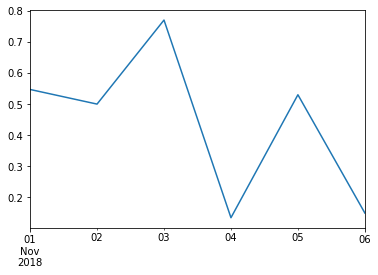

In [322]:
# Нарисовать график цены монеты ADA. 
# Так как индекс в нашей таблице временный, то pandas догадывается, что его можно использовать
# как ось времени на графиках.
price['ADA'].plot()

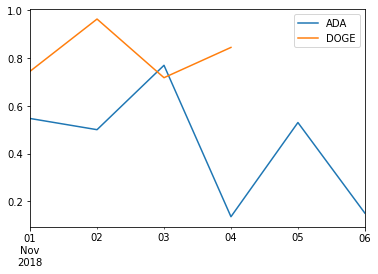

In [323]:
# Можно на одном графике нарисовать поведение цены сразу нескольких монет
price[['ADA', 'DOGE']].plot()

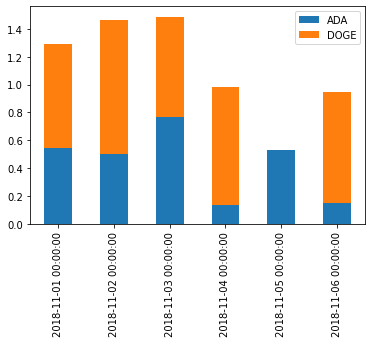

In [324]:
# Цену можно рисовать и в виде столбцовой диаграммы c различными настройками
price.plot.bar(stacked=True)

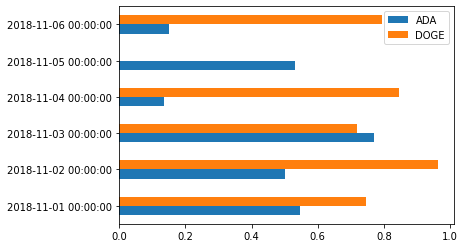

In [325]:
# Горизонтальная столбцовая диаграмма
price.plot.barh()

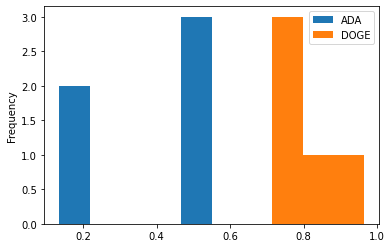

In [326]:
# Гистограмма
price.plot.hist(bins=10)

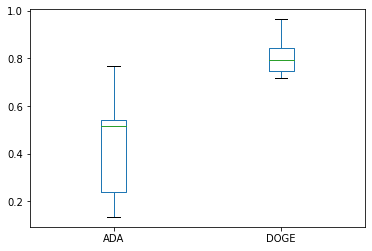

In [327]:
# Ящики с усами
price.plot.box()

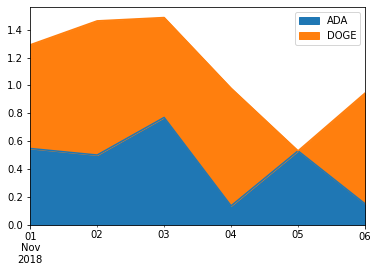

In [328]:
# Графики с заливкой
price.plot.area()

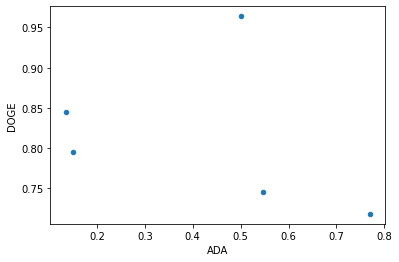

In [329]:
# Если хочется нарисовать пары каких либо значений в виде точек на плоскости, то подойдет scatter plot
price.plot.scatter(x='ADA', y='DOGE')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0bfa7c550>,
      dtype=object)

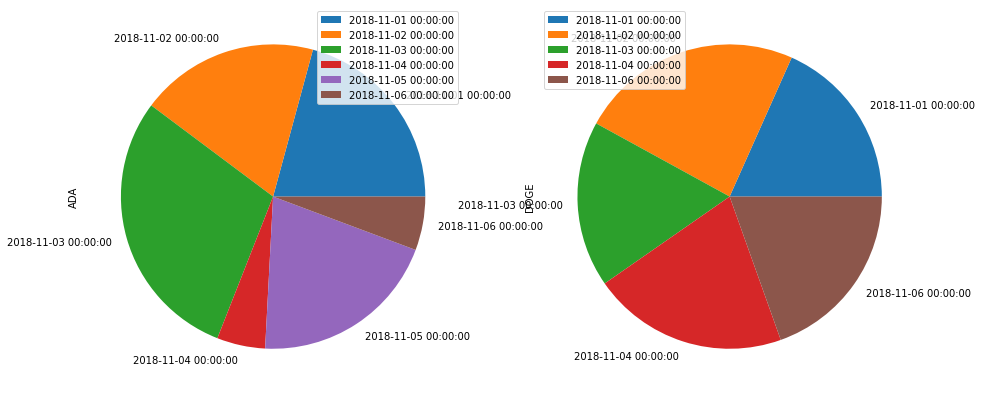

In [330]:
# И на десерт - пирожковая диаграмма
price.plot.pie(subplots=True, figsize=(15,7.5))

In [183]:
del price

# NB


## Другие инструменты работы с данными

Если ваш датасет не слишком большой, то pandas это де-факто лучший инструмент в наличии. В противном случае есть альтернативы:
 - [numpy](http://www.numpy.org/) - библиотека для низкоуровневой работы с многомерными массивами из примитивных типов данных. Подходит для "векторизованной" обработки. Numpy - ваш последний шанс все еще писать на обычном питоне, без биндингов на С. Подходит для задач быстрой обработки не слишком больших данных. На самом деле внутри, pandas использует numpy.
 - [Graphlab](https://turi.com/) - Платная питоновская библиотека для работы как большими данными так и с маленькими датасетами. Данные представляются как SFrame объекты, во многом похожие на DataFrame из pandas.
 - [Hadoop](https://hadoop.apache.org/) - стек технологии для работы с очень большими данными, в частности есть классический MapReduce.
 


## Другие инструменты визуализации


Для визуализации библиотек намного больше. Вот самые популярные
 - [Pandas](https://pandas.pydata.org/) - для быстрой и очень простой визуализации. Любая мелкая настройка потребует знания matplotlib
 - [Seaborn](https://seaborn.pydata.org/) - широкий но фиксированный набор сложных визуализаций с красивыми цветовыми схемами. Библиотека является надстройкой над matplotlib, и, опять же, тонкие настройки потребуют знания matplotlib.
   - [Галерея с примерами](https://seaborn.pydata.org/examples/index.html)
   - [Руководство](https://seaborn.pydata.org/tutorial.html)
 - [ggplot](http://ggplot.yhathq.com/) - многообещающая библиотека скопированная из R. Пока на этапе развития
 - [Bokeh](https://bokeh.pydata.org/en/latest/) - библиотека для визуализации в web.
 - [Plot.ly](https://plot.ly/) - библиотека для интерактивных и статических визуализаций. Нацелена на работу в облаке, но можно работать и локально.
   - [Галерея с примерами](https://plot.ly/python/)
   - [Краткое введение](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf)